<a href="https://colab.research.google.com/github/djbell01/563-DawsonBell/blob/main/Week_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo

In [32]:
import numpy as np
import matplotlib.pyplot as plt

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

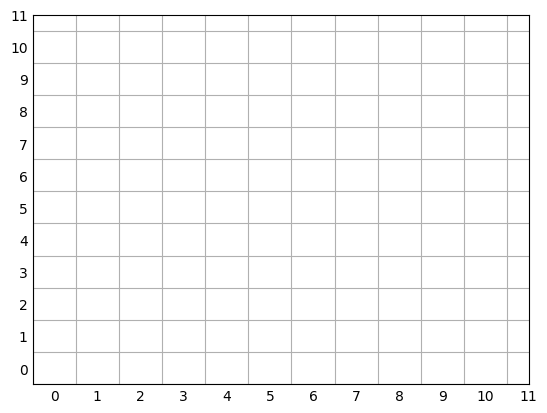

In [111]:
# Grid
class grid():
  def __init__(self,length,N):
    # Create a square grid with N particles
    self.length = length
    self.grid_spaces = length**2
    self.N = N
    self.rng = np.random.default_rng()

    # Generate random positions for N particles
    self.particles = []
    for i in range(N):
      x = self.rng.integers(0,length,1)
      y = self.rng.integers(0,length,1)
      self.particles.append(particle(x,y))

    # Check for overlapping particles, move if necessary
    for i in range(N):
      for j in range(N):
        if i == j:
          continue
        else:
          x_1 = self.particles[i].x
          y_1 = self.particles[i].y
          x_2 = self.particles[j].x
          y_2 = self.particles[j].y

          if (x_1 == x_2) and (y_1 == y_2):
            self.move_particle(i)
          else:
            continue

  def move_particle(self,index):
    # Determine where all empty spaces are and choose one at random.
    self.empty_spaces = []
    for i in range(self.length):
      for j in range(self.length):
        for particle in self.particles:
          if particle.x == i and particle.y == j:
            continue
          else:
            self.empty_spaces.append([i,j])

    rand = self.rng.integers(0,len(self.empty_spaces))
    rand_empty_space = self.empty_spaces[rand]
    self.particles[index].x = rand_empty_space[0]
    self.particles[index].y = rand_empty_space[1]

  # Visualize grid for debugging
  def plot_grid(self):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Define gridlines that align correctly
    gridlines = np.arange(0, self.length + 2)  # Include 0 to max_value + 1

    # Set major ticks at integer values
    ax.set_xticks(gridlines)
    ax.set_yticks(gridlines)

    # Set minor ticks in between
    minor_ticks = gridlines - 0.5
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)

    # Add grid lines for minor ticks
    ax.grid(which='minor')

    # Turn off tick labels
    ax.tick_params(axis='both', which='both', length=0)

    # Plot the point
    x_vals = []
    y_vals = []
    for i in range(self.N):
      x_vals.append(self.particles[i].x)
      y_vals.append(self.particles[i].y)
    ax.scatter(x_vals, y_vals, 400)

    # Set bounds and aspect ratio
    ax.set_xlim(-0.5, self.length + 0.5)
    ax.set_ylim(-0.5, self.length + 0.5)
    ax.set_aspect('equal', adjustable='box')

# Particle
class particle():
  def __init__(self,x,y):
    self.x = x
    self.y = y


grid = grid(10,10)
grid.plot_grid()

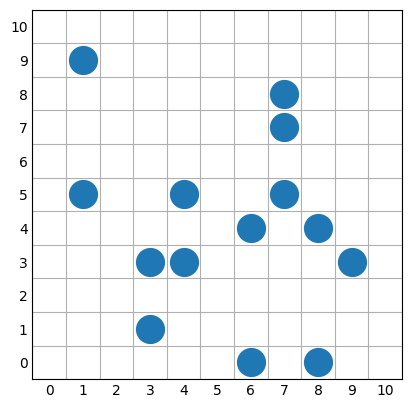

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Particle class
class particle():
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Grid class
class grid():
    def __init__(self, length, N):
        # Initialize grid dimensions and RNG
        self.length = length
        self.N = N
        self.rng = np.random.default_rng()

        # Track occupied positions
        self.occupied_positions = set()
        self.particles = []

        # Generate random positions for N particles without overlap
        while len(self.particles) < N:
            x = self.rng.integers(0, length)
            y = self.rng.integers(0, length)
            if (x, y) not in self.occupied_positions:
                self.particles.append(particle(x, y))
                self.occupied_positions.add((x, y))

    def move_particle(self, index):
        # Determine empty spaces
        empty_spaces = [
            (i, j)
            for i in range(self.length)
            for j in range(self.length)
            if (i, j) not in self.occupied_positions
        ]

        # Choose a random empty space
        rand_empty_space = empty_spaces[self.rng.integers(0, len(empty_spaces))]

        # Update particle's position and occupied positions
        old_position = (self.particles[index].x, self.particles[index].y)
        self.occupied_positions.remove(old_position)
        self.particles[index].x, self.particles[index].y = rand_empty_space
        self.occupied_positions.add(rand_empty_space)

  # Visualize grid for debugging
    def plot_grid(self):
      fig = plt.figure()
      ax = fig.add_subplot(1, 1, 1)

      # Define gridlines that align correctly
      gridlines = np.arange(0, self.length + 2)  # Include 0 to max_value + 1

      # Set major ticks at integer values
      ax.set_xticks(gridlines)
      ax.set_yticks(gridlines)

      # Set minor ticks in between
      minor_ticks = gridlines - 0.5
      ax.set_xticks(minor_ticks, minor=True)
      ax.set_yticks(minor_ticks, minor=True)

      # Add grid lines for minor ticks
      ax.grid(which='minor')

      # Turn off tick labels
      ax.tick_params(axis='both', which='both', length=0)

      # Plot the point
      x_vals = [p.x for p in self.particles]
      y_vals = [p.y for p in self.particles]
      ax.scatter(x_vals, y_vals, 400)

      # Set bounds and aspect ratio
      ax.set_xlim(-0.5, self.length + 0.5)
      ax.set_ylim(-0.5, self.length + 0.5)
      ax.set_aspect('equal', adjustable='box')

# Create and visualize the grid
grid_instance = grid(10, 14)
grid_instance.plot_grid()
